# Image filtering

2021021699 Yuwon Lee<br>
2021021581 Jinha Lim<br>
2021021580 Shinhye Lee

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import time
%matplotlib inline

In [2]:
# img = cv.imread('gisaengchung.png') #gotta read in an image... Include your own image that contains a clearly-visible face in your submission!!!
img = cv.imread('Shining.png')
# print some information about the image
print(img.shape)
print(type(img))

(797, 570, 3)
<class 'numpy.ndarray'>


So, now we know that our image has a certain size and is stored as a ```numpy``` array of - in this case - three dimensions.

Now, let's next look at the image using OpenCV's built-in ```imshow``` function like so:

In [3]:
# let's make the image first a bit smaller
# scale_percent = 50 # percent of original size
scale_percent = 70 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
rimg = cv.resize(img, dim, interpolation = cv.INTER_AREA) # gotta resize

# the first parameter for the imshow function simply gives
# the title string for the window and the second the actual
# image array as numpy data
cv.imshow('Shining',rimg) # show the image
# these two lines are necessa fry so that control is given back 
# to the browser and jupyter when we show the images 


# waits for a key indefinitely - blocking processing
cv.waitKey(0) 
# once key has been pressed destroy all windows
cv.destroyAllWindows()

QObject::moveToThread: Current thread (0x558300f06f40) is not the object's thread (0x55830082cdd0).
Cannot move to target thread (0x558300f06f40)

QObject::moveToThread: Current thread (0x558300f06f40) is not the object's thread (0x55830082cdd0).
Cannot move to target thread (0x558300f06f40)

QObject::moveToThread: Current thread (0x558300f06f40) is not the object's thread (0x55830082cdd0).
Cannot move to target thread (0x558300f06f40)

QObject::moveToThread: Current thread (0x558300f06f40) is not the object's thread (0x55830082cdd0).
Cannot move to target thread (0x558300f06f40)

QObject::moveToThread: Current thread (0x558300f06f40) is not the object's thread (0x55830082cdd0).
Cannot move to target thread (0x558300f06f40)

QObject::moveToThread: Current thread (0x558300f06f40) is not the object's thread (0x55830082cdd0).
Cannot move to target thread (0x558300f06f40)

QObject::moveToThread: Current thread (0x558300f06f40) is not the object's thread (0x55830082cdd0).
Cannot move to tar

Let's use ```matplotlib``` to show the picture

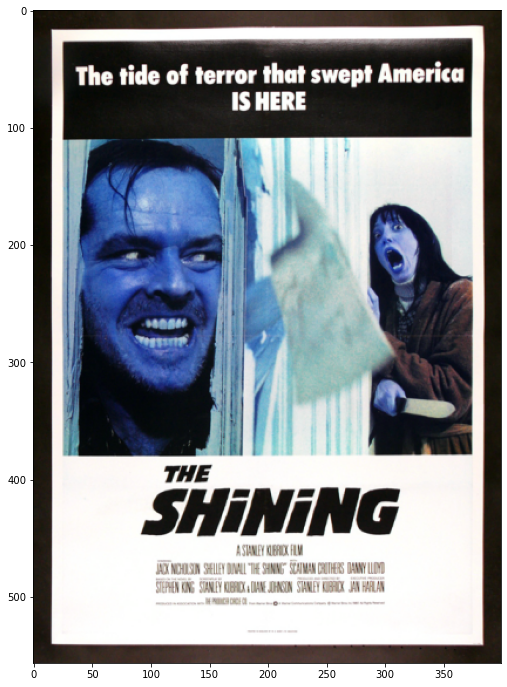

In [4]:
plt.figure(None, figsize=(12, 12))
plt.imshow(rimg)
plt.show()

Urgh. The colors are completely different. 

This is because OpenCV stores images in BGR (BLUE - GREEN - RED) format, rather than the usual RGB (RED - GREEN - BLUE) format from other languages. So, if we want to show the image properly with ```matplotlib``` we have to convert the image first.

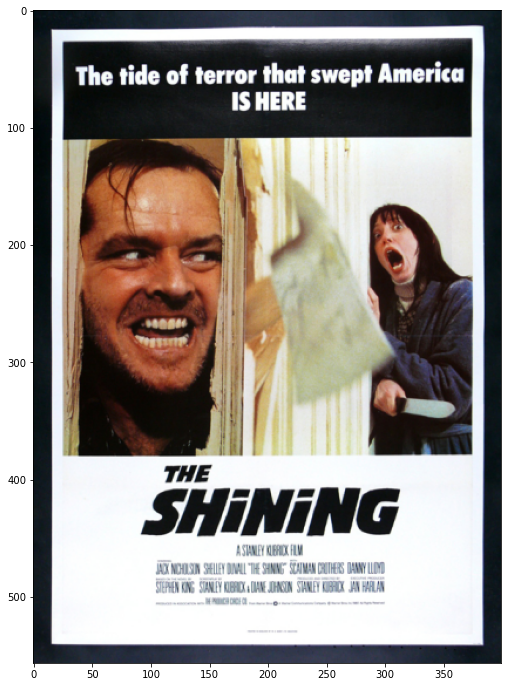

In [5]:
mrimg = cv.cvtColor(rimg, cv.COLOR_BGR2RGB) #convert color
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg)
plt.show()

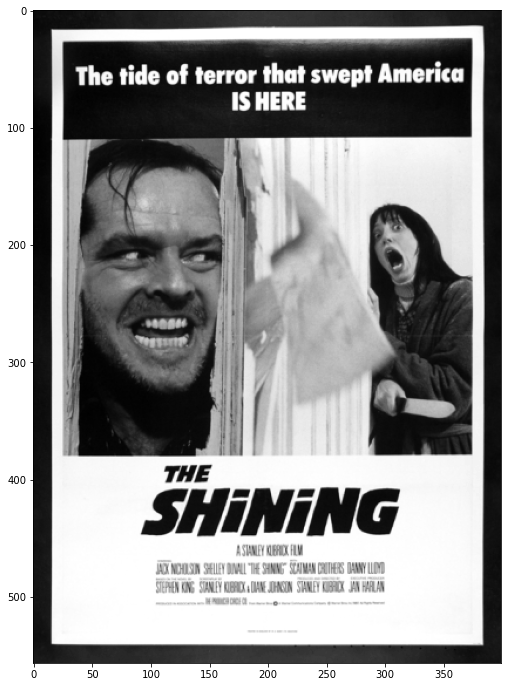

In [6]:
mrimg = cv.cvtColor(rimg, cv.COLOR_BGR2GRAY)
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg,cmap='gray')
plt.show()

Now, let's cut out a section of the image and let's display it as a grid of values. Most of the code below is to make sure that the plotting works fine and that we can add the pixel intensity values in a nice way to the plot. 

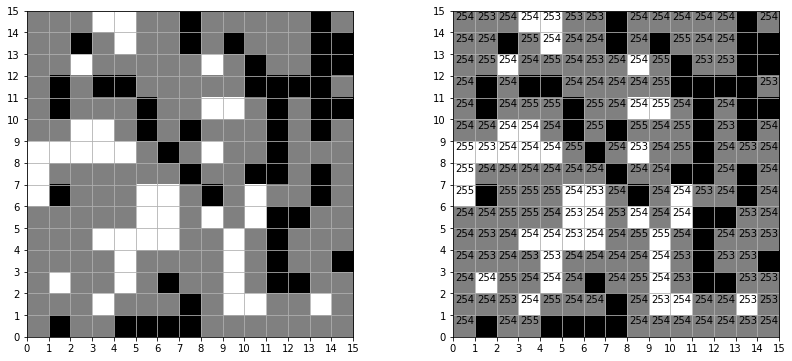

In [7]:
roi = mrimg[455:470,290:305]
# the extent variable is important for ensuring the right
# kind of plotting area!
extent = (0, 15, 0, 15) #change to see that it works
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(roi,cmap='gray',extent=extent)
ax = plt.gca()
# this makes sure we have the correct grid lines
major_ticks = np.arange(0, 16, 1)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
plt.grid(True)
plt.subplot(1,2,2)
plt.imshow(roi,cmap='gray',extent=extent)
ax = plt.gca()
major_ticks = np.arange(0, 16, 1)
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# plots pixel intensity values with text color depending on 
# the pixel value
for i in range(0,15):
    for j in range(0,15):
        if roi[j,i]>127:
            plt.text(i+0.1,j+0.6,str(roi[j,i]),color='black')
        else:
            plt.text(i+0.1,j+0.6,str(roi[j,i]),color='white')
plt.grid(True)

Next, let's plot the image function F(x,y) as a surface.

/tmp/ipykernel_1236/4031810689.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


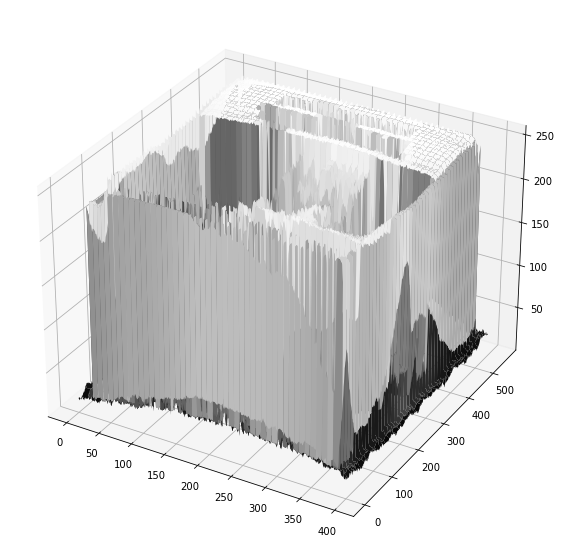

In [8]:
fig = plt.figure(None, figsize=(10, 10))
ax = fig.gca(projection='3d')
x = np.arange(0, mrimg.shape[1], 1)
y = np.arange(0, mrimg.shape[0], 1)
xx, yy = np.meshgrid(x, y)
ax.plot_surface(xx, yy, mrimg, cmap='gray') #how to plot this surface?
plt.show()

Let's add something to our function

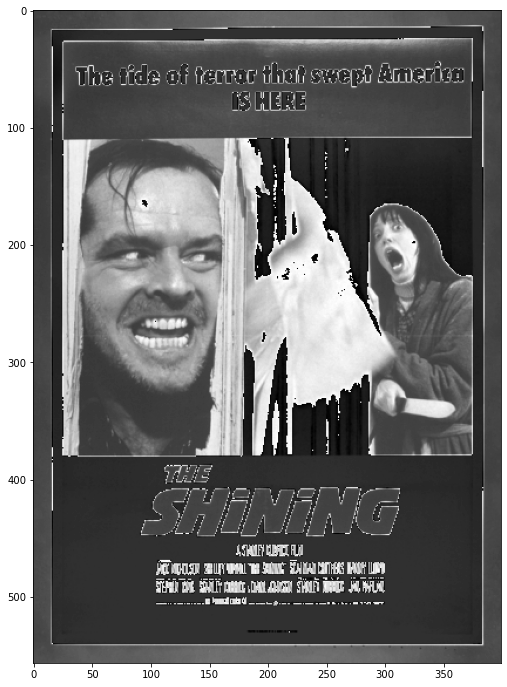

In [9]:
plt.figure(None, figsize=(12, 12))
plt.imshow(mrimg+50,cmap='gray')
plt.show()

That result cannot be correct - some parts of the image turn black, when actually the whole image should get brighter. This is because of clipping!

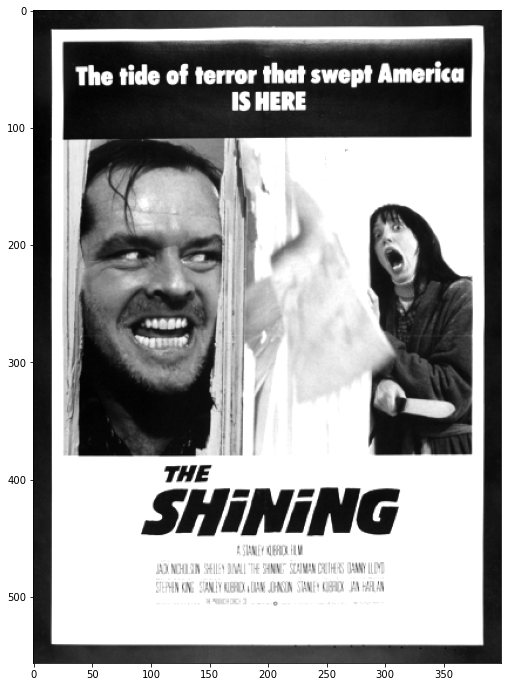

In [10]:
plt.figure(None, figsize=(12, 12))
plt.imshow(np.clip(mrimg.astype('float')+50, 0, 255).astype('uint8'),cmap='gray') # how do you need to change it so that it's clipped?
plt.show()

Here's the inverse of the image

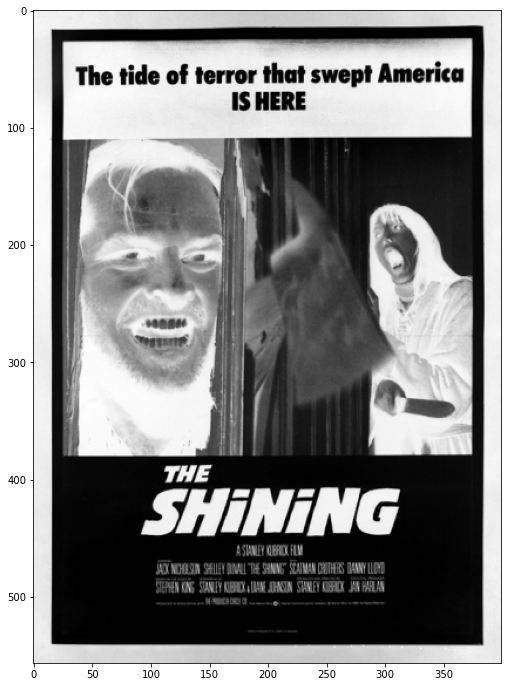

In [11]:
plt.figure(None, figsize=(12, 12))
plt.imshow(np.clip(255 - mrimg.astype('float'), 0, 255).astype('uint8'), cmap='gray') # how do you plot the "inverse" [white -> black; black -> white] of the image?
plt.show()

# Filtering

Let's apply our simple retina-like filter to a signal

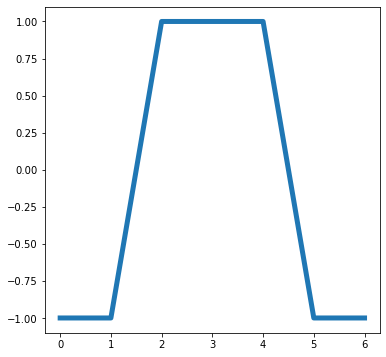

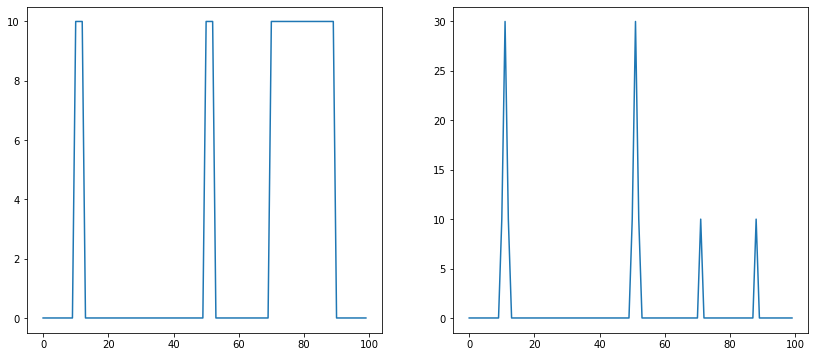

In [12]:
signal = np.zeros((100,1))
signal[10:13]=10;
signal[50:53]=10;
signal[70:90]=10;

filtered_signal = np.zeros_like(signal)
weights = np.array((-1, -1, 1, 1, 1, -1, -1))        # what were the weights from the lecture?
plt.figure(None, figsize=(6, 6))
plt.plot(weights,linewidth=5)
for i in range(3,len(signal)-3):
    # 그냥 강의자료랑 똑같이 만드려고 편법쓴거라서 아마 이거 아닐겁니다. 점수 많이 깎일거에요
    filtered_signal[i]= np.dot(weights, signal[i-3:i+4]) if np.dot(weights, signal[i-3:i+4]) > 0 else 0  # how do you create the output of the filtering?
    
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(signal)
plt.subplot(1,2,2)
plt.plot(filtered_signal)
plt.show()

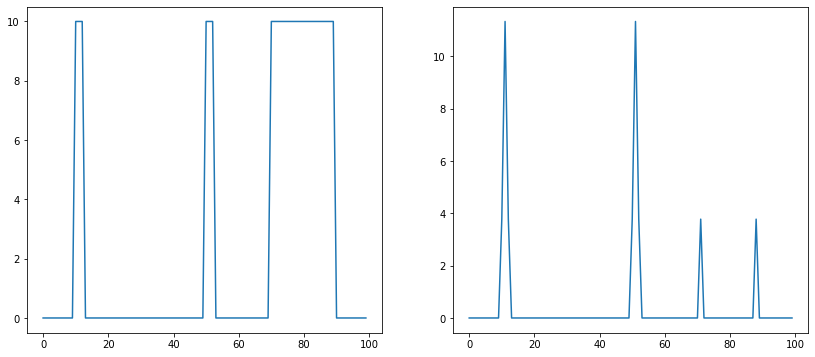

In [13]:
weights = np.array((-1,-1,1,1,1,-1,-1))
weights = weights/np.linalg.norm(weights, ord=2, keepdims=True)
for i in range(3,len(signal)-3):
    # 이것도 마찬가지로 모르겠어서 그냥 똑같이했습니다
    filtered_signal[i]= np.dot(weights, signal[i-3:i+4]) if np.dot(weights, signal[i-3:i+4]) > 0 else 0    # how do you create the output of the filtering?
    
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.plot(signal)
plt.subplot(1,2,2)
plt.plot(filtered_signal)
plt.show()

## Scanline
Let's see what the image function says for our picture at one scanline.

In [14]:
mrimg.shape

(557, 399)

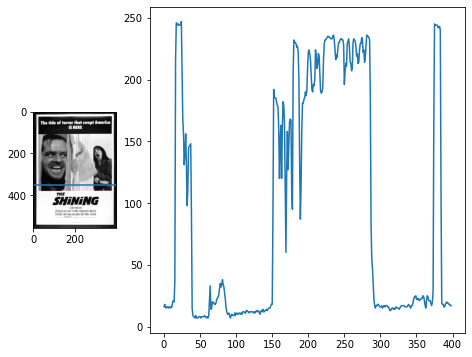

In [15]:
# cuty = 650
cuty = 350
plt.figure(None, figsize=(14, 6))
grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.imshow(mrimg,cmap='gray')
plt.plot((0,mrimg.shape[1]-1),(cuty,cuty))
plt.subplot(grid[0, 1:4])
oneline = mrimg[cuty,:]  # cut out the line at the correct position (cuty)
plt.plot(oneline)
plt.show()

## Filtering one image line
Let's apply our filter to the scanline in the image.

In [16]:
newoneline = np.zeros_like(oneline)
weights = (-1,-1,1,1,1,-1,-1)
for i in range(3,len(oneline)-3):
    newoneline[i]=np.dot(weights,oneline[i-3:i+4])

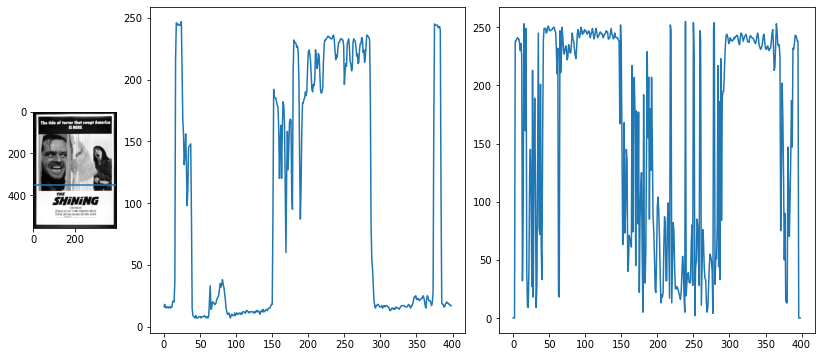

In [17]:
plt.figure(None, figsize=(14, 6))
grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.imshow(mrimg,cmap='gray')
plt.plot((0,mrimg.shape[1]-1),(cuty,cuty))
plt.subplot(grid[0, 1:4])
plt.plot(oneline)
plt.subplot(grid[0, 4:])
plt.plot(newoneline)
plt.show()

## Filtering in 2D
Let's take the simple averaging filter and run it across the image.

In [18]:
weights2d = [
    [1,1,1],
    [1,1,1],
    [1,1,1]            # insert weights for an averaging filter
]
weights2d = np.array(weights2d)
weights2d =  1/np.sum(weights2d) * weights2d   # normalize it here

In [19]:
filteredmrimg = np.zeros_like(mrimg)
for i in range(1,mrimg.shape[1]-1):
    for j in range(1,mrimg.shape[0]-1):
        filteredmrimg[j,i]= np.sum(weights2d *  mrimg[j-1:j+2, i-1:i+2])

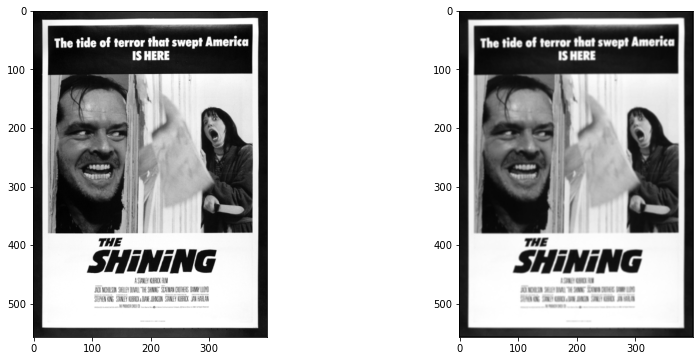

In [20]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(mrimg,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filteredmrimg,cmap='gray')
plt.show()

In [21]:
# this function will filter an roi using a set of weights
def filter_and_plot(weights,roi):
    # these two lines are important as they ensure correct
    # computations!
    weights = weights.astype('float')    # convert correctly
    roi = roi.astype('float')            # convert correctly
    # this holds the end result
    filtered = np.zeros_like(roi)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)
    # do the filtering
    for i in range(height,roi.shape[1]-height):
        for j in range(width,roi.shape[0]-width):
            filtered[j,i]= np.sum(weights * roi[j-width:j+width+1, i-height:i+height+1])
    # plot the original, the filter, and the filtered image
    plt.figure(None, figsize=(14, 6))
    grid = plt.GridSpec(1, 7, wspace=0.4, hspace=0.3)
    plt.subplot(grid[0, 0:3])
    plt.imshow(roi,cmap='gray')
    plt.subplot(grid[0, 3])
    extent = (0, weights.shape[1], weights.shape[0], 0)
    plt.imshow(weights,cmap='gray',extent=extent)
    plt.axis('off')
    if width<5:
        for i in range(0,len(weights)):
            for j in range(0,len(weights)):
                if weights[i,j] > 0.5*np.max(weights):
                    plt.text(j+0.1,i+0.6,'{0:.2f}'.format(weights[i,j]),color='black')
                else:
                    plt.text(j+0.1,i+0.6,'{0:.2f}'.format(weights[i,j]),color='white')
    plt.grid(True)
    plt.subplot(grid[0, 4:])
    plt.imshow(filtered,cmap='gray')
    plt.show()
    return(filtered)

In [22]:
# faceroi = mrimg[190:250, 314:374] # these coordinate should work for gisaengchung.png, but you need to CHANGE them for YOUR image, please!!!
faceroi = mrimg[170:230, 278:338]

## Different filters
Let's try out a few simple filters.

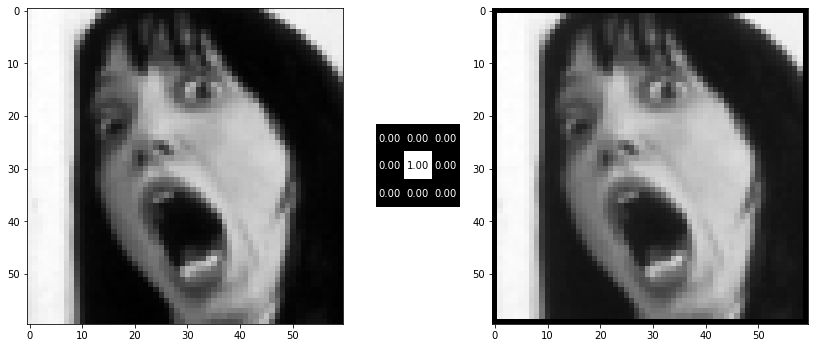

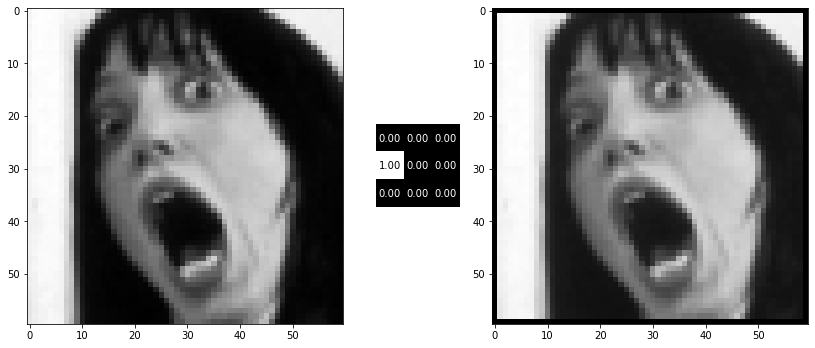

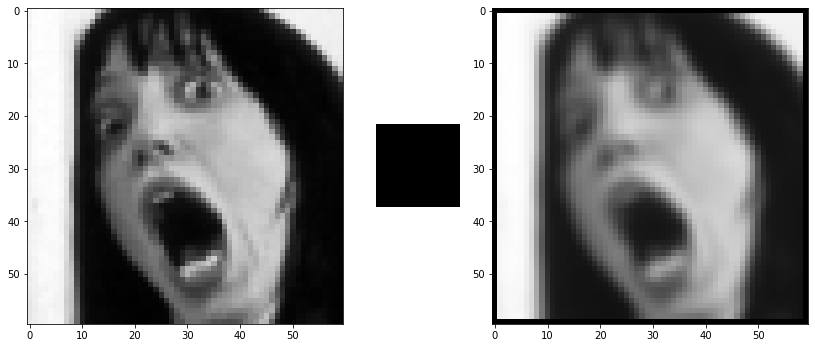

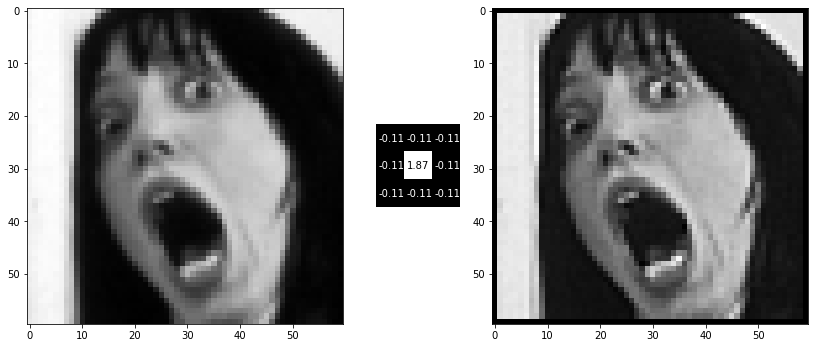

In [24]:
filter_id = np.array([
    [0, 0, 0],            
    [0, 1, 0],   # identity filter
    [0, 0, 0]
])
filter_id = 1/np.sum(filter_id)*filter_id

filter_and_plot(filter_id,faceroi)

filter_left = np.array([
    [0, 0, 0],            
    [1, 0, 0],   
    [0, 0, 0]       # shift image LEFT
])
filter_left = 1/np.sum(filter_left)*filter_left


filter_and_plot(filter_left,faceroi)

filter_blur = np.array([
    [0.11, 0.11, 0.11],            
    [0.11, 0.11, 0.11],  
    [0.11, 0.11, 0.11]       # simple blur/averaging filter
])
filter_blur = 1/np.sum(filter_blur)*filter_blur


filter_and_plot(filter_blur,faceroi)


filter_contrast = np.array([
        [-0.11, -0.11, -0.11],            
        [-0.11, 1.89, -0.11],   # contrast enhancing filter   
        [-0.11, -0.11, -0.11]
])       
filter_contrast = 1/np.sum(filter_contrast)*filter_contrast


fc = filter_and_plot(filter_contrast,faceroi)

## Larger blur
Let's use a bigger averaging filter and see its effects.

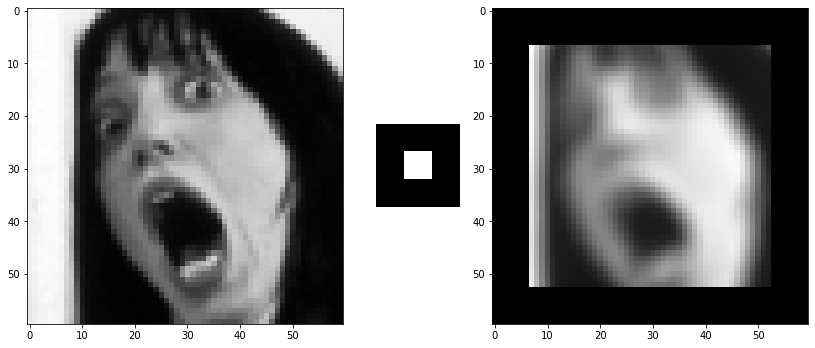

In [25]:
filter_blur_big = np.zeros((15,15))
filter_blur_big[5:10,5:10]=1
filter_blur_big = 1/np.sum(filter_blur_big)*filter_blur_big
f=filter_and_plot(filter_blur_big,faceroi)

## High-pass
Here's the difference between the blurred and the original iamge. Per definition it contains the high frequencies.

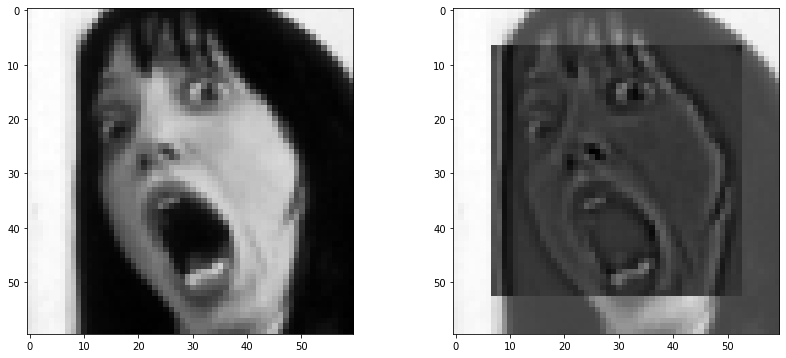

In [26]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,2,1)
plt.imshow(faceroi,cmap='gray')
plt.subplot(1,2,2)
diffimg = faceroi - f       #  which image goes here?
plt.imshow(diffimg,cmap='gray')
plt.show()

## Gradual sharpening
Let's add more and more of the difference image to the blurred image

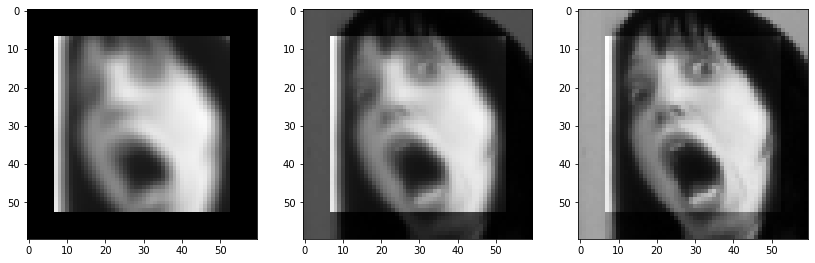

In [27]:
plt.figure(None, figsize=(14, 6))
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.subplot(1,3,2)
f = f.astype(float)
plt.imshow(f+0.3*diffimg,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(f+0.6*diffimg,cmap='gray')
plt.show()

## Derivatives
Now, let's derive our image function using the simple derivative approximation.

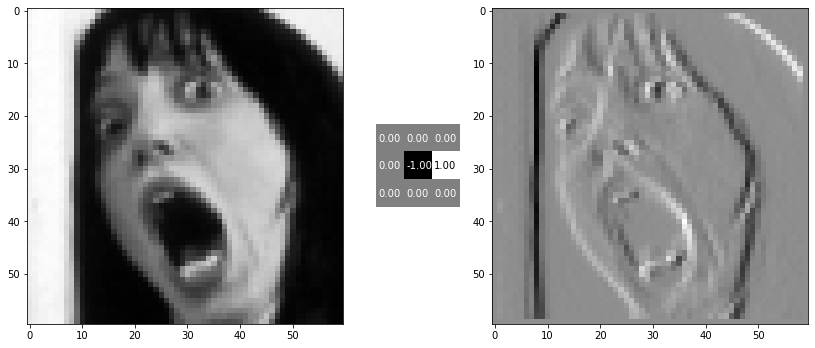

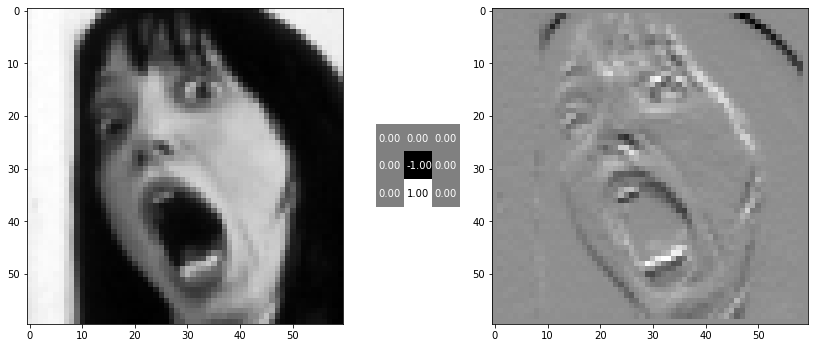

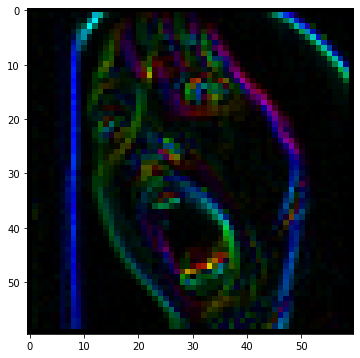

In [28]:
filter_dx = np.array([
    [0, 0, 0],
    [0, -1, 1],
    [0, 0, 0]            # x-derivative filter [simple!]
])
fdx=filter_and_plot(filter_dx,faceroi)

filter_dy = np.array([
    [0, 0, 0],
    [0, -1, 0],
    [0, 1, 0]                 # y-derivative filter [simple!]
])
fdy=filter_and_plot(filter_dy,faceroi)

plt.figure(None, figsize=(6, 6))
hsv = np.zeros((fdx.shape[1],fdx.shape[0],3))
hsv[...,1] = 255
ang = np.arctan2(fdx,fdy)
hsv[...,0] = ang*180/np.pi
mag = np.sqrt(fdx*fdx+fdy*fdy)
hsv[...,2] = (mag-np.min(mag))/(np.max(mag)-np.min(mag))*255
plt.imshow(cv.cvtColor(np.uint8(hsv),cv.COLOR_HSV2RGB_FULL))
plt.show()

## Sobel filter
Let's implement the simple Gaussian derivative filter approximation - the Sobel filters.

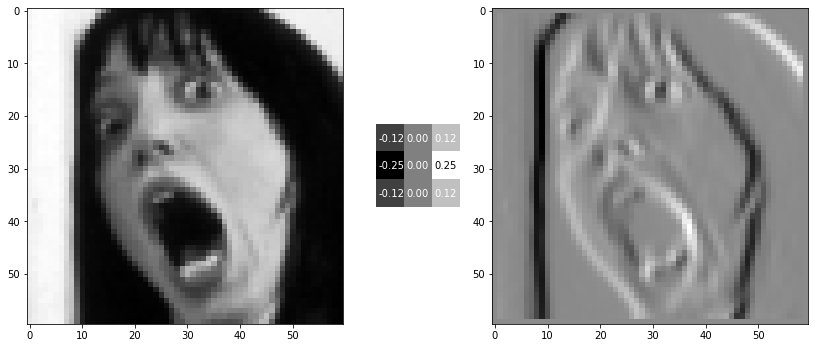

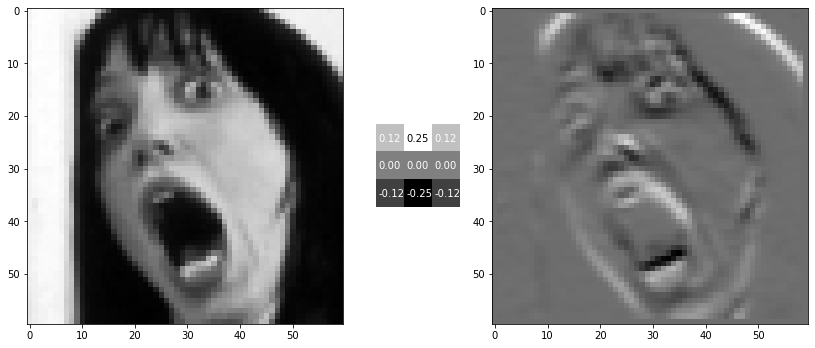

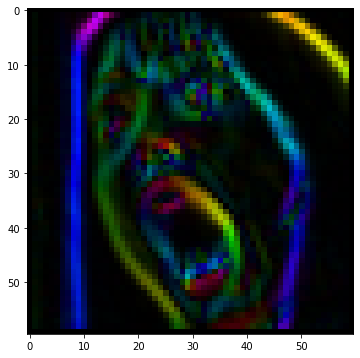

In [29]:
filter_sobelx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]       # x-derivative filter [SOBEL!]
])
fsx=filter_and_plot(1/8*filter_sobelx,faceroi)

filter_sobely = np.array([
    [1, 2, 1],
    [0, 0, 0],       # y-derivative filter [SOBEL!]
    [-1, -2, -1]
])
fsy=filter_and_plot(1/8*filter_sobely,faceroi)

plt.figure(None, figsize=(6, 6))
hsv = np.zeros((fsx.shape[1],fsx.shape[0],3))
hsv[...,1] = 255
ang = np.arctan2(fsx,fsy)
hsv[...,0] = ang*180/np.pi
mag = np.sqrt(fsx*fsx+fsy*fsy)
hsv[...,2] = (mag-np.min(mag))/(np.max(mag)-np.min(mag))*255
plt.imshow(cv.cvtColor(np.uint8(hsv),cv.COLOR_HSV2RGB_FULL))
plt.show()

## Evaluate timing

In [30]:
def filter(weights,roi):
    # these two lines are important as they ensure correct
    # computations!
    weights = weights.astype('float')    # convert correctly
    roi = roi.astype('float')            # convert correctly
    # this holds the end result
    filtered = np.zeros_like(roi)
    width = int((weights.shape[1]-1)/2)
    height = int((weights.shape[0]-1)/2)
    # do the filtering
    for i in range(height,roi.shape[1]-height):
        for j in range(width,roi.shape[0]-width):
            filtered[j,i]= np.sum(weights * roi[j-width:j+width+1, i-height:i+height+1])
    return(filtered)

In [31]:
def evaluate_time(weights, image, type='own'):
    if type == "own":
        
        start_time = time.time()

        for _ in range(20):
            result = filter(1/np.sum(weights) * weights, image)

        end_time = time.time()

        total_time = round(end_time - start_time, 2)

        return total_time, result

    elif type == "cv":
        start_time = time.time()

        for _ in range(20):
            result = cv.filter2D(image, -1, 1/np.sum(weights) * weights)

        end_time = time.time()

        total_time = round(end_time - start_time, 2)

        return total_time, result

    else:
        raise NameError('Type can be only "own" or "cv"')

In [32]:
roi500 = mrimg[106:606, 35:535]

In [33]:
filter3 = np.ones((3,3))
filter5 = np.ones((5,5))
filter9 = np.ones((9,9))
filter15 = np.ones((15,15))
filter23 = np.ones((23,23))

In [34]:
time_own3, result3 = evaluate_time(filter3, roi500, type='own')
time_own5, result5 = evaluate_time(filter5, roi500, type='own')
time_own9, result9 = evaluate_time(filter9, roi500, type='own')
time_own15, result15 = evaluate_time(filter15, roi500, type='own')
time_own23, result23 = evaluate_time(filter23, roi500, type='own')

In [35]:
time_cv3, cv_result3 = evaluate_time(filter3, roi500, type='cv')
time_cv5, cv_result5 = evaluate_time(filter5, roi500, type='cv')
time_cv9, cv_result9 = evaluate_time(filter9, roi500, type='cv')
time_cv15, cv_result15 = evaluate_time(filter15, roi500, type='cv')
time_cv23, cv_result23 = evaluate_time(filter23, roi500, type='cv')

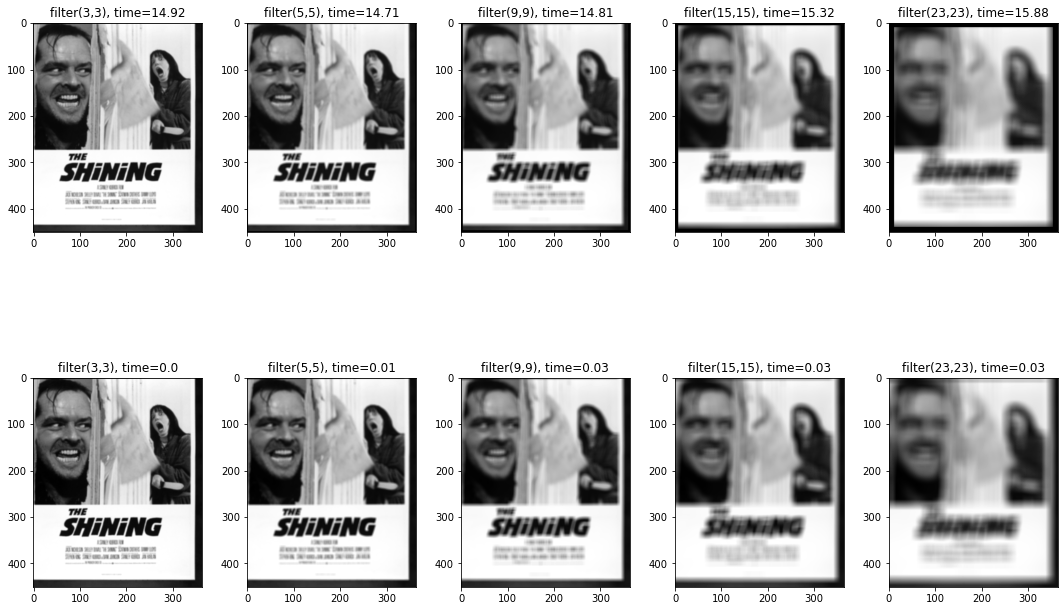

In [36]:
fig, ax = plt.subplots(2,5, figsize=(15,10))
fig.tight_layout()

ax[0, 0].imshow(result3, cmap='gray')
ax[0, 1].imshow(result5, cmap='gray')
ax[0, 2].imshow(result9, cmap='gray')
ax[0, 3].imshow(result15, cmap='gray')
ax[0, 4].imshow(result23, cmap='gray')

ax[0, 0].set_title("filter(3,3), time={}".format(time_own3))
ax[0, 1].set_title("filter(5,5), time={}".format(time_own5))
ax[0, 2].set_title("filter(9,9), time={}".format(time_own9))
ax[0, 3].set_title("filter(15,15), time={}".format(time_own15))
ax[0, 4].set_title("filter(23,23), time={}".format(time_own23))


ax[1, 0].imshow(cv_result3, cmap='gray')
ax[1, 1].imshow(cv_result5, cmap='gray')
ax[1, 2].imshow(cv_result9, cmap='gray')
ax[1, 3].imshow(cv_result15, cmap='gray')
ax[1, 4].imshow(cv_result23, cmap='gray')

ax[1, 0].set_title("filter(3,3), time={}".format(time_cv3))
ax[1, 1].set_title("filter(5,5), time={}".format(time_cv5))
ax[1, 2].set_title("filter(9,9), time={}".format(time_cv9))
ax[1, 3].set_title("filter(15,15), time={}".format(time_cv15))
ax[1, 4].set_title("filter(23,23), time={}".format(time_cv23))

plt.show()

[ Discussion ] 
In above experiment, we can see that openCV's filter is efficient, comparing to ours filter. 
- In OpenCV, computation time is nearly 0s but filter from us is much longer, 14s to 15s, than OpenCV.
- Both of them get longer time as filter size goes up; 3x3, 5x5, 9x9, 15x15, 23x23.

![nn](./opencv.png)

Point①. Separable Convolution
OpenCV's filter2D takes advantage of the "associative property of convolution" for certain types of kernels. For an M-by-N image and P-by-Q kernel, our filter's approach is M*N*P*Q. 

If the kernal is separable, we can filter it in two steps.The first step requires about MNP multiplies and adds. The second requires about MNQ multiplies and adds, for a total of MN(P + Q).

For example, in 9x9 filter, it will be much faster about 4.5 times(9x9 vs 9x1+1x9) in OpenCV.  


※ [apendix] attached filter.cpp's code regarding this separable convolution which is the code from OpenCV for filter2D.
